## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
"""
Your code here (optional)
確認硬體資源
"""
## 確認使用GPU

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import tensorflow as tf
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))  

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    #x = x / 255.
    x = x / (x.max()-x.min())
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0713 01:17:22.382011 23540 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 01:17:22.383994 23540 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 01:17:22.387984 23540 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0713 01:17:22.481734 23540 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 01:17:22.488715 23540 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0713 01:17:22.600414 23540 deprecation.py:323] From C:\Users\vince\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 01:17:22.699504 23540 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 82us/step - loss: 1.9279 - acc: 0.3057 - val_loss: 1.7326 - val_acc: 0.3864
Epoch 2/100
50000/50000 [==============================] - 3s 64us/step - loss: 1.7048 - acc: 0.3894 - val_loss: 1.6977 - val_acc: 0.3890
Epoch 3/100
50000/50000 [==============================] - 3s 69us/step - loss: 1.6179 - acc: 0.4241 - val_loss: 1.5729 - val_acc: 0.4355
Epoch 4/100
50000/50000 [==============================] - 4s 70us/step - loss: 1.5497 - acc: 0.4477 - val_loss: 1.5811 - val_acc: 0.4375
Epoch 5/100
50000/50000 [==============================] - 3s 69us/step - loss: 1.5112 - acc: 0.4626 - val_loss: 1.5125 - val_acc: 0.4577
Epoch 6/100
50000/50000 [==============================] - 3s 64us/step - loss: 1.4739 - acc: 0.4738 - val_loss: 1.5210 - val_acc: 0.4582
Epoch 7/100
50000/50000 [==============================] - 3s 65us/step - loss: 1.4468 - acc: 0.4848 - val_loss: 1.4870 - 

50000/50000 [==============================] - 3s 65us/step - loss: 0.5495 - acc: 0.8033 - val_loss: 1.9473 - val_acc: 0.5200
Epoch 60/100
50000/50000 [==============================] - 3s 64us/step - loss: 0.5525 - acc: 0.8006 - val_loss: 1.9557 - val_acc: 0.5139
Epoch 61/100
50000/50000 [==============================] - 3s 62us/step - loss: 0.5404 - acc: 0.8048 - val_loss: 1.9782 - val_acc: 0.5269
Epoch 62/100
50000/50000 [==============================] - 3s 62us/step - loss: 0.5209 - acc: 0.8141 - val_loss: 2.0157 - val_acc: 0.5162
Epoch 63/100
50000/50000 [==============================] - 3s 64us/step - loss: 0.5090 - acc: 0.8181 - val_loss: 2.0746 - val_acc: 0.5162
Epoch 64/100
50000/50000 [==============================] - 3s 62us/step - loss: 0.4977 - acc: 0.8223 - val_loss: 2.1070 - val_acc: 0.5131
Epoch 65/100
50000/50000 [==============================] - 3s 65us/step - loss: 0.4861 - acc: 0.8248 - val_loss: 2.1534 - val_acc: 0.5035
Epoch 66/100
50000/50000 [==============

### 嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練

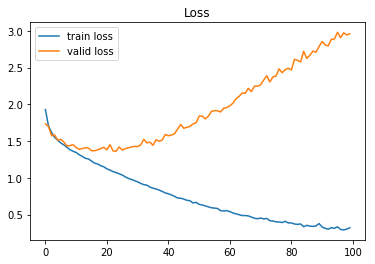

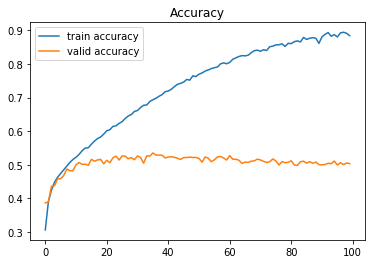

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

### 嘗試將 mlp 疊更深 (e.g 6 層)，進行訓練後觀察 learning curve 的走勢

In [16]:
def build_mlp2(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp2(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [17]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [18]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 109us/step - loss: 2.1299 - acc: 0.2001 - val_loss: 1.9244 - val_acc: 0.3112
Epoch 2/100
50000/50000 [==============================] - 5s 91us/step - loss: 1.8314 - acc: 0.3366 - val_loss: 1.7547 - val_acc: 0.3713
Epoch 3/100
50000/50000 [==============================] - 5s 98us/step - loss: 1.7263 - acc: 0.3757 - val_loss: 1.6683 - val_acc: 0.3878
Epoch 4/100
50000/50000 [==============================] - 4s 83us/step - loss: 1.6520 - acc: 0.4031 - val_loss: 1.6363 - val_acc: 0.4008
Epoch 5/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.5967 - acc: 0.4265 - val_loss: 1.5506 - val_acc: 0.4481
Epoch 6/100
50000/50000 [==============================] - 4s 89us/step - loss: 1.5504 - acc: 0.4429 - val_loss: 1.5519 - val_acc: 0.4380
Epoch 7/100
50000/50000 [==============================] - 4s 80us/step - loss: 1.5002 - acc: 0.4639 - val_loss: 1.5985 -

50000/50000 [==============================] - 4s 81us/step - loss: 0.5883 - acc: 0.7894 - val_loss: 1.9938 - val_acc: 0.5049
Epoch 60/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.5832 - acc: 0.7903 - val_loss: 2.0575 - val_acc: 0.5028
Epoch 61/100
50000/50000 [==============================] - 4s 77us/step - loss: 0.6163 - acc: 0.7789 - val_loss: 2.0085 - val_acc: 0.4999
Epoch 62/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.5821 - acc: 0.7897 - val_loss: 2.0705 - val_acc: 0.5034
Epoch 63/100
50000/50000 [==============================] - 4s 77us/step - loss: 0.5580 - acc: 0.7993 - val_loss: 2.1347 - val_acc: 0.4968
Epoch 64/100
50000/50000 [==============================] - 4s 77us/step - loss: 0.5470 - acc: 0.8037 - val_loss: 2.1043 - val_acc: 0.5062
Epoch 65/100
50000/50000 [==============================] - 4s 78us/step - loss: 0.5367 - acc: 0.8080 - val_loss: 2.2256 - val_acc: 0.4937
Epoch 66/100
50000/50000 [==============

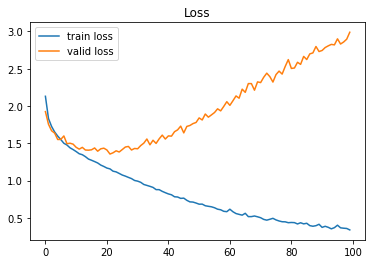

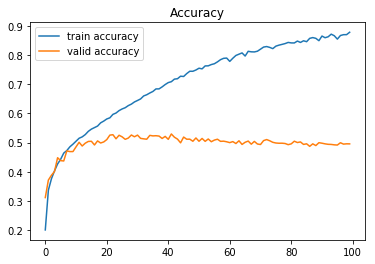

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()